In [ ]:
!pip install statsforecast -q

In [ ]:
import pandas as pd
from datetime import datetime
from time import strptime
import numpy as np
import matplotlib.pyplot as plt
from statsforecast import StatsForecast
from statsforecast.models import ADIDA, CrostonClassic, IMAPA, TSB, CrostonOptimized

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:26: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
full_data = pd.read_csv('/content/drive/MyDrive/Datasets/Supply-Chain-Data.csv', sep=';')
full_data.head(3)

,DATE,PRODUCT_A,PRODUCT_B,PRODUCT_C,PRODUCT_D
0,3-Jan-11,210,702,18,516
1,4-Jan-11,10294,402,,324
2,5-Jan-11,3395,438,,3618


In [ ]:
# multiple unpivot columns with ignore_index
data = pd.melt(full_data,
                 id_vars=['DATE'],
                 value_vars=['PRODUCT_A', 'PRODUCT_B', 'PRODUCT_C', 'PRODUCT_D'],
                 ignore_index=True)
data.head()

,DATE,variable,value
0,3-Jan-11,PRODUCT_A,210
1,4-Jan-11,PRODUCT_A,10294
2,5-Jan-11,PRODUCT_A,3395
3,6-Jan-11,PRODUCT_A,432
4,7-Jan-11,PRODUCT_A,106


In [ ]:
data = data.rename(columns={'DATE': 'ds', 'variable': 'unique_id', 'value': 'y'})
data.head()

,ds,unique_id,y
0,3-Jan-11,PRODUCT_A,210
1,4-Jan-11,PRODUCT_A,10294
2,5-Jan-11,PRODUCT_A,3395
3,6-Jan-11,PRODUCT_A,432
4,7-Jan-11,PRODUCT_A,106


In [ ]:
df=data[data.columns[[1,0,2]]]

In [ ]:
df.head()

,unique_id,ds,y
0,PRODUCT_A,3-Jan-11,210
1,PRODUCT_A,4-Jan-11,10294
2,PRODUCT_A,5-Jan-11,3395
3,PRODUCT_A,6-Jan-11,432
4,PRODUCT_A,7-Jan-11,106


In [ ]:
#split column A into two columns: column A and column B
df[['Day', 'Month', 'Year']] = df['ds'].str.split('-', 2, expand=True)

<ipython-input-8-e99b529a9969>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['Day', 'Month', 'Year']] = df['ds'].str.split('-', 2, expand=True)
<ipython-input-8-e99b529a9969>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Day', 'Month', 'Year']] = df['ds'].str.split('-', 2, expand=True)
<ipython-input-8-e99b529a9969>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Day', 'Month', 'Year']] = df['ds'].

In [ ]:
df.head()

,unique_id,ds,y,Day,Month,Year
0,PRODUCT_A,3-Jan-11,210,3,Jan,11
1,PRODUCT_A,4-Jan-11,10294,4,Jan,11
2,PRODUCT_A,5-Jan-11,3395,5,Jan,11
3,PRODUCT_A,6-Jan-11,432,6,Jan,11
4,PRODUCT_A,7-Jan-11,106,7,Jan,11


In [ ]:
df['month'] = [strptime(str(x), '%b').tm_mon for x in df['Month']]

<ipython-input-10-f3f328c0fe24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = [strptime(str(x), '%b').tm_mon for x in df['Month']]


In [ ]:
df.head()

,unique_id,ds,y,Day,Month,Year,month
0,PRODUCT_A,3-Jan-11,210,3,Jan,11,1
1,PRODUCT_A,4-Jan-11,10294,4,Jan,11,1
2,PRODUCT_A,5-Jan-11,3395,5,Jan,11,1
3,PRODUCT_A,6-Jan-11,432,6,Jan,11,1
4,PRODUCT_A,7-Jan-11,106,7,Jan,11,1


In [ ]:
del df['Month']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2272 entries, 0 to 2271
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   unique_id  2272 non-null   object
 1   ds         2272 non-null   object
 2   y          2272 non-null   object
 3   Day        2272 non-null   object
 4   Year       2272 non-null   object
 5   month      2272 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 106.6+ KB


In [ ]:
df['n_year'] = '20' + df.Year

<ipython-input-13-85554b17ddb7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['n_year'] = '20' + df.Year


In [ ]:
df.head()

,unique_id,ds,y,Day,Year,month,n_year
0,PRODUCT_A,3-Jan-11,210,3,11,1,2011
1,PRODUCT_A,4-Jan-11,10294,4,11,1,2011
2,PRODUCT_A,5-Jan-11,3395,5,11,1,2011
3,PRODUCT_A,6-Jan-11,432,6,11,1,2011
4,PRODUCT_A,7-Jan-11,106,7,11,1,2011


In [ ]:
df['date'] = pd.to_datetime(dict(year=df.n_year, month=df.month, day=df.Day))

<ipython-input-15-18adbf4e9ac9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(dict(year=df.n_year, month=df.month, day=df.Day))


In [ ]:
df.tail()

,unique_id,ds,y,Day,Year,month,n_year,date
2267,PRODUCT_D,25-Mar-13,168,25,13,3,2013,2013-03-25
2268,PRODUCT_D,26-Mar-13,1848,26,13,3,2013,2013-03-26
2269,PRODUCT_D,27-Mar-13,1914,27,13,3,2013,2013-03-27
2270,PRODUCT_D,28-Mar-13,672,28,13,3,2013,2013-03-28
2271,PRODUCT_D,29-Mar-13,96,29,13,3,2013,2013-03-29


In [ ]:
# Remove two columns name is 'C' and 'D'
df.drop(['ds', 'Day', 'Year', 'month', 'n_year'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2272 entries, 0 to 2271
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   unique_id  2272 non-null   object        
 1   y          2272 non-null   object        
 2   date       2272 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 53.4+ KB


In [ ]:
df = df.rename(columns={'date': 'ds'})
df = df[['unique_id', 'ds', 'y']]
df.head()

,unique_id,ds,y
0,PRODUCT_A,2011-01-03,210
1,PRODUCT_A,2011-01-04,10294
2,PRODUCT_A,2011-01-05,3395
3,PRODUCT_A,2011-01-06,432
4,PRODUCT_A,2011-01-07,106


In [ ]:
print(pd.isnull(df.loc[1, 'y']))

False


In [ ]:
df.head(6)

,unique_id,ds,y
0,PRODUCT_A,2011-01-03,210
1,PRODUCT_A,2011-01-04,10294
2,PRODUCT_A,2011-01-05,3395
3,PRODUCT_A,2011-01-06,432
4,PRODUCT_A,2011-01-07,106
5,PRODUCT_A,2011-01-10,


In [ ]:
df = df.replace(r'^\s+$', np.nan, regex=True)

In [ ]:
df.head(6)

,unique_id,ds,y
0,PRODUCT_A,2011-01-03,210
1,PRODUCT_A,2011-01-04,10294
2,PRODUCT_A,2011-01-05,3395
3,PRODUCT_A,2011-01-06,432
4,PRODUCT_A,2011-01-07,106
5,PRODUCT_A,2011-01-10,NaN


In [ ]:
df['y'] = df['y'].replace(np.nan, 0)
df['y'] = pd.to_numeric(df['y'])

In [ ]:
#df.groupby(["state", "gender"])["last_name"].count()
n_by_state = df.groupby(["unique_id"])["y"].count()
n_by_state

unique_id
PRODUCT_A    568
PRODUCT_B    568
PRODUCT_C    568
PRODUCT_D    568
Name: y, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2272 entries, 0 to 2271
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   unique_id  2272 non-null   object        
 1   ds         2272 non-null   datetime64[ns]
 2   y          2272 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 53.4+ KB


In [ ]:
df.tail(10)

,unique_id,ds,y
2262,PRODUCT_D,2013-03-18,12
2263,PRODUCT_D,2013-03-19,2184
2264,PRODUCT_D,2013-03-20,2148
2265,PRODUCT_D,2013-03-21,336
2266,PRODUCT_D,2013-03-22,48
2267,PRODUCT_D,2013-03-25,168
2268,PRODUCT_D,2013-03-26,1848
2269,PRODUCT_D,2013-03-27,1914
2270,PRODUCT_D,2013-03-28,672
2271,PRODUCT_D,2013-03-29,96


In [ ]:
print('First date', df['ds'].min())
print('Last date', df['ds'].max())

First date 2011-01-03 00:00:00
Last date 2013-03-29 00:00:00


In [ ]:
first_date = df.groupby("unique_id")["ds"].min()
first_date

unique_id
PRODUCT_A   2011-01-03
PRODUCT_B   2011-01-03
PRODUCT_C   2011-01-03
PRODUCT_D   2011-01-03
Name: ds, dtype: datetime64[ns]

In [ ]:
last_date = df.groupby("unique_id")["ds"].max()
last_date

unique_id
PRODUCT_A   2013-03-29
PRODUCT_B   2013-03-29
PRODUCT_C   2013-03-29
PRODUCT_D   2013-03-29
Name: ds, dtype: datetime64[ns]

In [ ]:
count_date = df.groupby("unique_id")["ds"].count()
count_date

unique_id
PRODUCT_A    568
PRODUCT_B    568
PRODUCT_C    568
PRODUCT_D    568
Name: ds, dtype: int64

In [ ]:
# Get the count of Zeros in column 'D'
count = df['y'].value_counts()[0]
count

611

In [ ]:
filtered = df.query('unique_id == "PRODUCT_A" and y == 0')
print(filtered)

     unique_id         ds  y
5    PRODUCT_A 2011-01-10  0
19   PRODUCT_A 2011-01-28  0
251  PRODUCT_A 2011-12-29  0
265  PRODUCT_A 2012-01-19  0
287  PRODUCT_A 2012-02-20  0
336  PRODUCT_A 2012-04-27  0
359  PRODUCT_A 2012-05-31  0
558  PRODUCT_A 2013-03-18  0


In [ ]:
train = df.loc[df['ds'] < '2013-01-02']
valid = df.loc[(df['ds'] >= '2013-01-02')]
h = valid['ds'].nunique()

In [ ]:
train.tail()

,unique_id,ds,y
2204,PRODUCT_D,2012-12-24,12
2205,PRODUCT_D,2012-12-26,2304
2206,PRODUCT_D,2012-12-27,510
2207,PRODUCT_D,2012-12-28,84
2208,PRODUCT_D,2012-12-31,12


In [ ]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 505 to 2271
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   unique_id  252 non-null    object        
 1   ds         252 non-null    datetime64[ns]
 2   y          252 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 7.9+ KB


In [ ]:
train.head(6)

,unique_id,ds,y
0,PRODUCT_A,2011-01-03,210
1,PRODUCT_A,2011-01-04,10294
2,PRODUCT_A,2011-01-05,3395
3,PRODUCT_A,2011-01-06,432
4,PRODUCT_A,2011-01-07,106
5,PRODUCT_A,2011-01-10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2272 entries, 0 to 2271
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   unique_id  2272 non-null   object        
 1   ds         2272 non-null   datetime64[ns]
 2   y          2272 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 53.4+ KB


In [ ]:
print(train.shape)
print(valid.shape)

(2020, 3)
(252, 3)


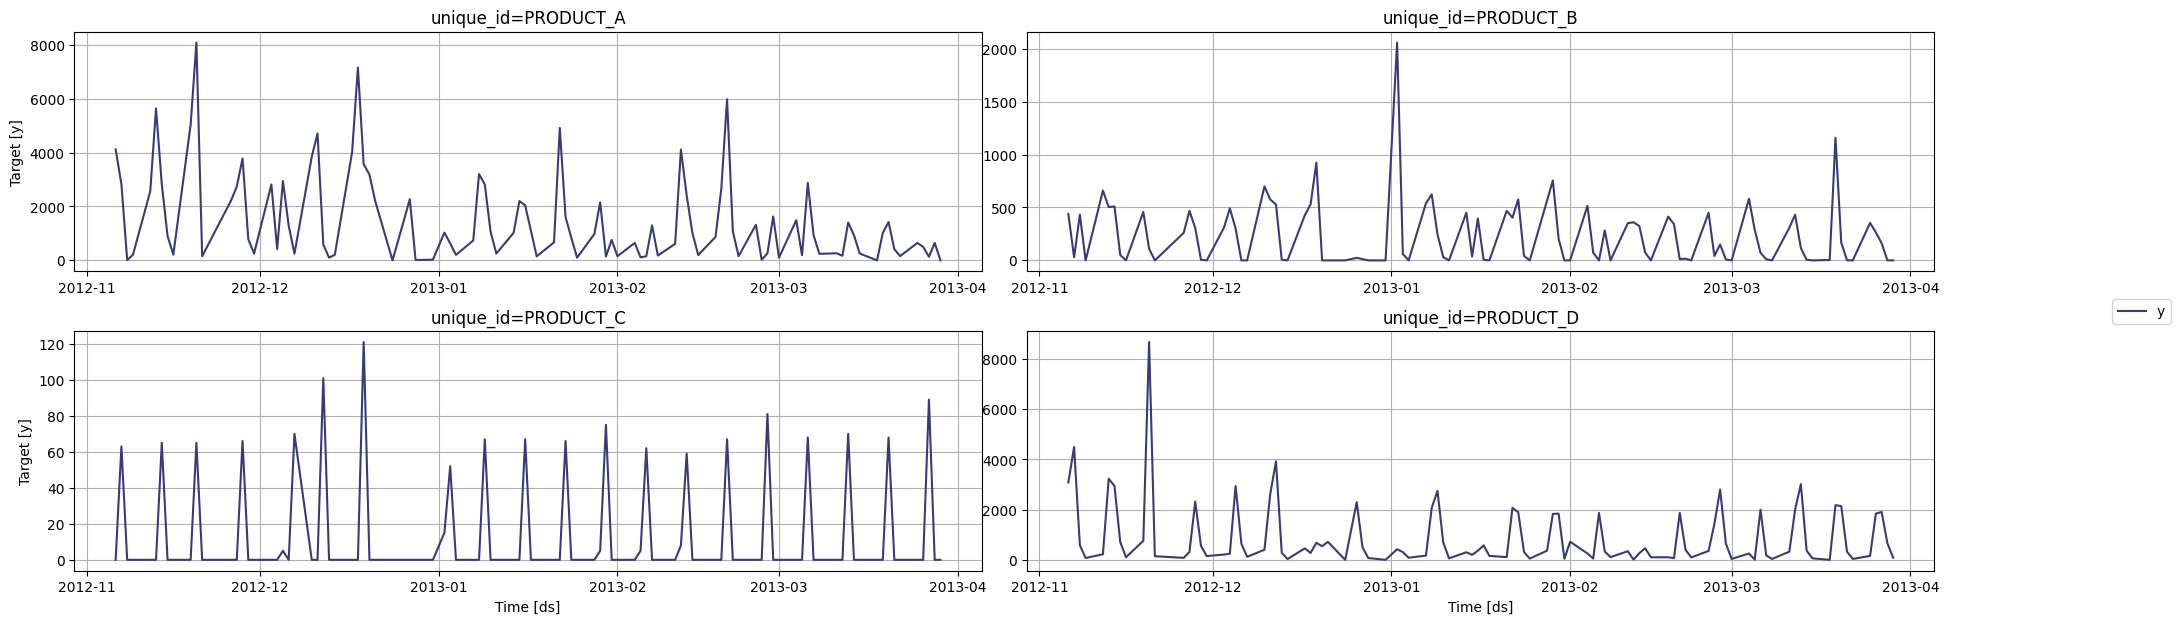

In [ ]:
StatsForecast.plot(df, plot_random = False, max_insample_length = 100)

In [ ]:
dates = df['ds'].unique()[-28:] # last 28 days

train = df.query('ds not in @dates')
test = df.query('ds in @dates')

In [ ]:
dates

array(['2013-02-20T00:00:00.000000000', '2013-02-21T00:00:00.000000000',
       '2013-02-22T00:00:00.000000000', '2013-02-25T00:00:00.000000000',
       '2013-02-26T00:00:00.000000000', '2013-02-27T00:00:00.000000000',
       '2013-02-28T00:00:00.000000000', '2013-03-01T00:00:00.000000000',
       '2013-03-04T00:00:00.000000000', '2013-03-05T00:00:00.000000000',
       '2013-03-06T00:00:00.000000000', '2013-03-07T00:00:00.000000000',
       '2013-03-08T00:00:00.000000000', '2013-03-11T00:00:00.000000000',
       '2013-03-12T00:00:00.000000000', '2013-03-13T00:00:00.000000000',
       '2013-03-14T00:00:00.000000000', '2013-03-15T00:00:00.000000000',
       '2013-03-18T00:00:00.000000000', '2013-03-19T00:00:00.000000000',
       '2013-03-20T00:00:00.000000000', '2013-03-21T00:00:00.000000000',
       '2013-03-22T00:00:00.000000000', '2013-03-25T00:00:00.000000000',
       '2013-03-26T00:00:00.000000000', '2013-03-27T00:00:00.000000000',
       '2013-03-28T00:00:00.000000000', '2013-03-29

In [ ]:
model = StatsForecast(models=[ ADIDA(),
                                CrostonClassic(),
                                IMAPA(),
                                TSB(alpha_d=0.1, alpha_p=0.1)],
                      freq='D',
                      n_jobs=-1)
model.fit(train)

StatsForecast(models=[ADIDA,CrostonClassic,IMAPA,TSB])

In [ ]:
p = model.predict(h=28)
p = p.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:417: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
p

,unique_id,ds,ADIDA,CrostonClassic,IMAPA,TSB,y
0,PRODUCT_A,2013-02-20,1292.975952,1292.975952,1292.975952,1292.975952,5978.0
1,PRODUCT_A,2013-02-21,1292.975952,1292.975952,1292.975952,1292.975952,1079.0
2,PRODUCT_A,2013-02-22,1292.975952,1292.975952,1292.975952,1292.975952,157.0
3,PRODUCT_A,2013-02-23,1292.975952,1292.975952,1292.975952,1292.975952,NaN
4,PRODUCT_A,2013-02-24,1292.975952,1292.975952,1292.975952,1292.975952,NaN
...,...,...,...,...,...,...,...
107,PRODUCT_D,2013-03-15,433.668610,433.668610,433.668610,433.668610,72.0
108,PRODUCT_D,2013-03-16,433.668610,433.668610,433.668610,433.668610,NaN
109,PRODUCT_D,2013-03-17,433.668610,433.668610,433.668610,433.668610,NaN
110,PRODUCT_D,2013-03-18,433.668610,433.668610,433.668610,433.668610,12.0


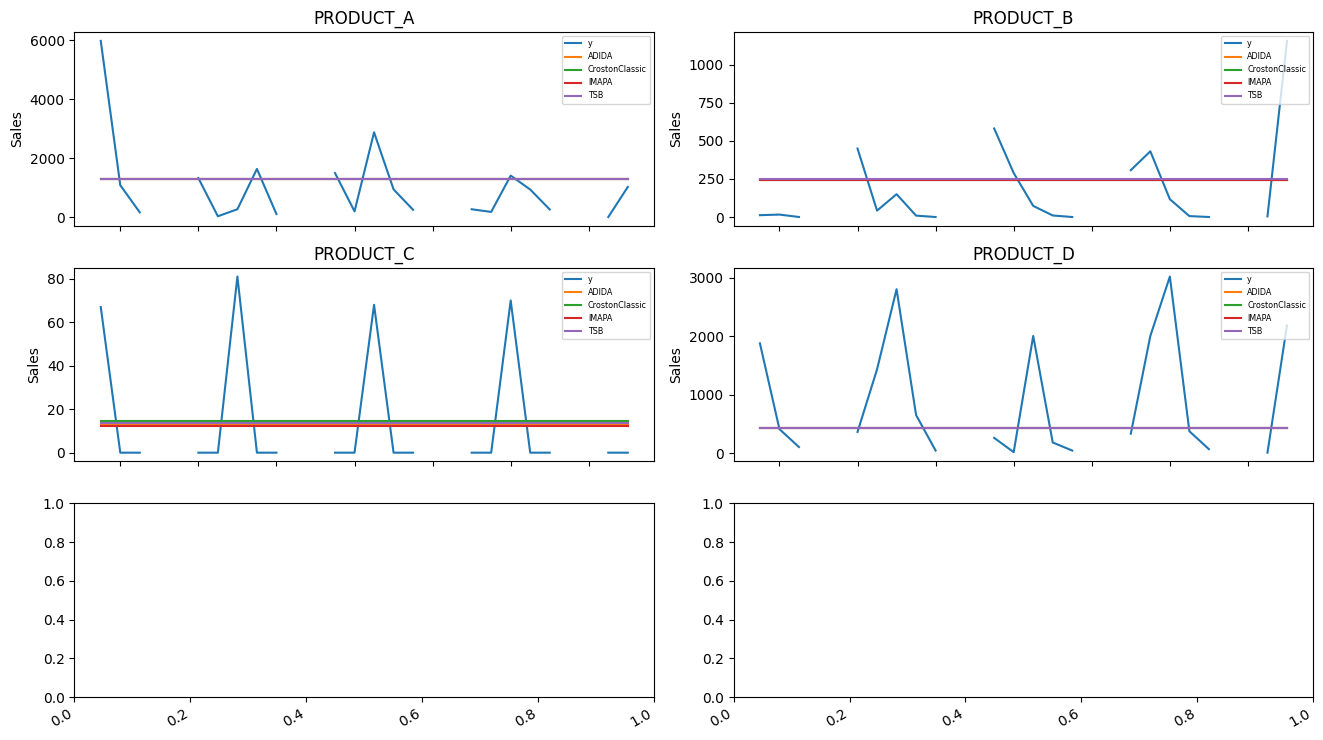

In [ ]:
fig,ax = plt.subplots(3,2, figsize=(1280/96, 720/96))
ax = ax.flatten()

p_ = p.set_index('ds')
for ax_, product in zip(ax, p['unique_id'].unique()[:6]):
    product_y = p_.loc[p_['unique_id'] == product, 'y']
    ax_.set_title(f"{product}")
    ax_.plot(product_y, label='y')

    for model_ in ['ADIDA', 'CrostonClassic', 'IMAPA', 'TSB']:
        product_p = p_.loc[p_['unique_id'] == product, model_]
        ax_.plot(product_p, label=model_)
        ax_.set_xlabel('Week')
        ax_.set_ylabel('Sales')
    ax_.legend(loc='upper right', fontsize='xx-small')

fig.autofmt_xdate()
fig.tight_layout()

In [ ]:
def cfe(y_true, y_pred):
    cfe_t = np.cumsum(y_true - y_pred)
    cfe_min= np.min(cfe_t)
    cfe_max = np.max(cfe_t)
    return cfe_t.iloc[-1], cfe_min, cfe_max

cfe_table = pd.DataFrame(columns=['unique_id', 'ADIDA', 'CrostonClassic', 'IMAPA', 'TSB'])
cfe_table['unique_id'] = p['unique_id'].unique()
for model_ in ['ADIDA', 'CrostonClassic', 'IMAPA', 'TSB']:
    cfe_table[model_] = cfe_table['unique_id'].apply(lambda x: cfe(p.loc[p['unique_id'] == x, 'y'], p.loc[p['unique_id'] == x, model_])[0])
cfe_table = cfe_table.set_index('unique_id')
cfe_table['best'] = cfe_table.abs().idxmin(axis=1)
print(cfe_table.head(5).to_markdown())

| unique_id   |      ADIDA |   CrostonClassic |      IMAPA |        TSB | best           |
|:------------|-----------:|-----------------:|-----------:|-----------:|:---------------|
| PRODUCT_A   | -5514.52   |      -5514.52    | -5514.52   | -5514.52   | ADIDA          |
| PRODUCT_B   | -1160.45   |      -1145.02    | -1160.45   | -1296.61   | CrostonClassic |
| PRODUCT_C   |    20.5582 |         -5.68636 |    36.1908 |    15.3204 | CrostonClassic |
| PRODUCT_D   |  9557.63   |       9557.63    |  9557.63   |  9557.63   | ADIDA          |


In [ ]:
mse_table = pd.DataFrame(columns=['unique_id', 'ADIDA', 'CrostonClassic', 'IMAPA', 'TSB'])
mse_table['unique_id'] = p['unique_id'].unique()
for model_ in ['ADIDA', 'CrostonClassic', 'IMAPA', 'TSB']:
    mse_table[model_] = mse_table['unique_id'].apply(lambda x: np.sqrt(np.mean((p.loc[p['unique_id'] == x, 'y'] - p.loc[p['unique_id'] == x, model_])**2)))
mse_table = mse_table.set_index('unique_id')
mse_table['best'] = mse_table.idxmin(axis=1)
print(mse_table.head(5).to_markdown())

| unique_id   |     ADIDA |   CrostonClassic |    IMAPA |       TSB | best           |
|:------------|----------:|-----------------:|---------:|----------:|:---------------|
| PRODUCT_A   | 1373.9    |        1373.9    | 1373.9   | 1373.9    | ADIDA          |
| PRODUCT_B   |  290.637  |         290.484  |  290.637 |  292.072  | CrostonClassic |
| PRODUCT_C   |   28.7275 |          28.7105 |   28.766 |   28.7193 | CrostonClassic |
| PRODUCT_D   | 1104.73   |        1104.73   | 1104.73  | 1104.73   | ADIDA          |


In [ ]:
mse_table = pd.DataFrame(columns=['unique_id', 'ADIDA', 'CrostonClassic', 'IMAPA', 'TSB'])
mse_table['unique_id'] = p['unique_id'].unique()
for model_ in ['ADIDA', 'CrostonClassic', 'IMAPA', 'TSB']:
    mse_table[model_] = mse_table['unique_id'].apply(lambda x: np.sqrt(np.mean((p.loc[p['unique_id'] == x, 'y'] - p.loc[p['unique_id'] == x, model_])**2)))
mse_table = mse_table.set_index('unique_id')
mse_table['best'] = mse_table.idxmin(axis=1)
print(mse_table.head(5).to_markdown())

| unique_id   |     ADIDA |   CrostonClassic |    IMAPA |       TSB | best           |
|:------------|----------:|-----------------:|---------:|----------:|:---------------|
| PRODUCT_A   | 1373.9    |        1373.9    | 1373.9   | 1373.9    | ADIDA          |
| PRODUCT_B   |  290.637  |         290.484  |  290.637 |  292.072  | CrostonClassic |
| PRODUCT_C   |   28.7275 |          28.7105 |   28.766 |   28.7193 | CrostonClassic |
| PRODUCT_D   | 1104.73   |        1104.73   | 1104.73  | 1104.73   | ADIDA          |


In [ ]:
from statsforecast import StatsForecast
from statsforecast.models import TSB

alpha_d = np.linspace(0.1, 0.9, 5)
alpha_p = np.linspace(0.1, 0.9, 5)

model = StatsForecast(models=[TSB(alpha_d = alpha_d_, alpha_p = alpha_p_, alias=f"TSB_{alpha_d_:.1f}_{alpha_p_:.1f}")
                              for alpha_d_ in alpha_d for alpha_p_ in alpha_p],
                      freq='D', n_jobs=-1)
model.fit(train)

StatsForecast(models=[TSB_0.1_0.1,TSB_0.1_0.3,TSB_0.1_0.5,TSB_0.1_0.7,TSB_0.1_0.9,TSB_0.3_0.1,TSB_0.3_0.3,TSB_0.3_0.5,TSB_0.3_0.7,TSB_0.3_0.9,TSB_0.5_0.1,TSB_0.5_0.3,TSB_0.5_0.5,TSB_0.5_0.7,TSB_0.5_0.9,TSB_0.7_0.1,TSB_0.7_0.3,TSB_0.7_0.5,TSB_0.7_0.7,TSB_0.7_0.9,TSB_0.9_0.1,TSB_0.9_0.3,TSB_0.9_0.5,TSB_0.9_0.7,TSB_0.9_0.9])

In [ ]:
p = model.predict(h=28)
p = p.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

def cfe(y_true, y_pred):
    cfe_t = np.cumsum(y_true - y_pred)
    cfe_min= np.min(cfe_t)
    cfe_max = np.max(cfe_t)
    return cfe_t.iloc[-1], cfe_min, cfe_max


model_names = [f"TSB_{alpha_d_:.1f}_{alpha_p_:.1f}" for alpha_d_ in alpha_d for alpha_p_ in alpha_p]
cfe_table = pd.DataFrame(columns=['unique_id'] + model_names)
cfe_table['unique_id'] = p['unique_id'].unique()
for model_ in model_names:
    cfe_table[model_] = cfe_table['unique_id'].apply(lambda x: cfe(p.loc[p['unique_id'] == x, 'y'], p.loc[p['unique_id'] == x, model_])[0])
cfe_table = cfe_table.set_index('unique_id')
cfe_table['best'] = cfe_table.abs().idxmin(axis=1)
print(cfe_table[cfe_table['best'].unique().tolist()[:3]+['best']].head(5).to_markdown())

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:417: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


| unique_id   |   TSB_0.1_0.1 |   TSB_0.3_0.1 | best        |
|:------------|--------------:|--------------:|:------------|
| PRODUCT_A   |    -5514.52   |   -10795.1    | TSB_0.1_0.1 |
| PRODUCT_B   |    -1296.61   |     -941.868  | TSB_0.3_0.1 |
| PRODUCT_C   |       15.3204 |       51.8568 | TSB_0.1_0.1 |
| PRODUCT_D   |     9557.63   |    14396.2    | TSB_0.1_0.1 |


In [ ]:
final_model = StatsForecast(models=[ADIDA(), CrostonOptimized()],
                      freq='D',
                      n_jobs=-1)
final_model.fit(df)
p = final_model.predict(h=1)
p.round()

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:417: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,ADIDA,CrostonOptimized
unique_id,,,
PRODUCT_A,2013-03-30,617.0,626.0
PRODUCT_B,2013-03-30,167.0,185.0
PRODUCT_C,2013-03-30,15.0,14.0
PRODUCT_D,2013-03-30,877.0,877.0


# Cross Validation

In [ ]:
from statsforecast.models import SimpleExponentialSmoothingOptimized as SESOpt

models = [CrostonOptimized(), ADIDA(), IMAPA(), TSB(0.2, 0.2), SESOpt()]

In [ ]:
sf = StatsForecast(
    df=df,
    models=models,
    freq='H',
    n_jobs=-1 # use all computing power available
)

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:399: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


In [ ]:
h_cv_df = sf.cross_validation(
    df=df,
    h=24,
    step_size=24,
    n_windows=5
)

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:417: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


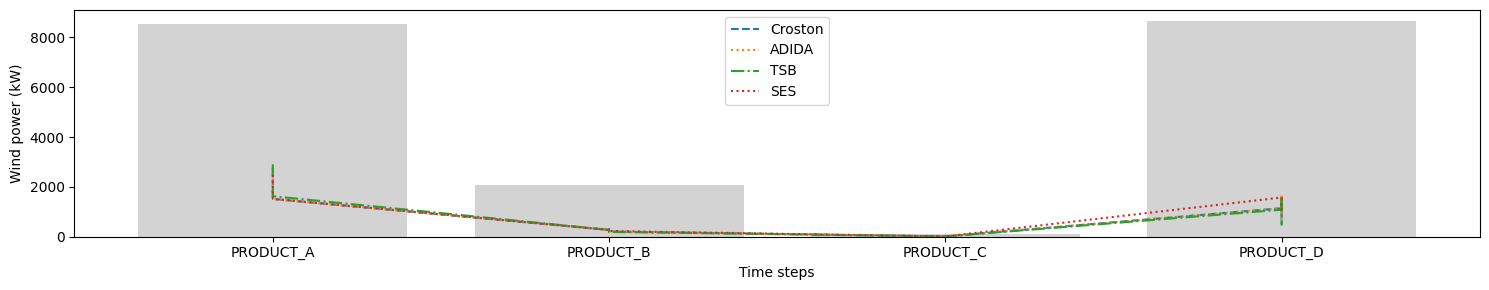

In [ ]:
fig, ax = plt.subplots( figsize=(15,3))

ax.bar(h_cv_df.index, h_cv_df['y'], color='lightgrey')
ax.plot(h_cv_df.index, h_cv_df['CrostonOptimized'], ls='--', label='Croston')
ax.plot(h_cv_df.index, h_cv_df['ADIDA'], ls=':', label='ADIDA')
ax.plot(h_cv_df.index, h_cv_df['TSB'], ls='-.', label='TSB')
ax.plot(h_cv_df.index, h_cv_df['SESOpt'], ls=':', label='SES')

ax.set_ylabel('Wind power (kW)')
ax.set_xlabel('Time steps')

ax.legend(loc='best')

plt.tight_layout()

In [ ]:
from sklearn.metrics import mean_absolute_error

mae_croston_h = mean_absolute_error(h_cv_df['y'], h_cv_df['CrostonOptimized'])
mae_adida_h = mean_absolute_error(h_cv_df['y'], h_cv_df['ADIDA'])
mae_tsb_h = mean_absolute_error(h_cv_df['y'], h_cv_df['TSB'])
mae_ses_h = mean_absolute_error(h_cv_df['y'], h_cv_df['SESOpt'])

y = [mae_croston_h, mae_adida_h, mae_tsb_h, mae_ses_h]
x = ['Croston', 'ADIDA', 'TSB', 'SES']

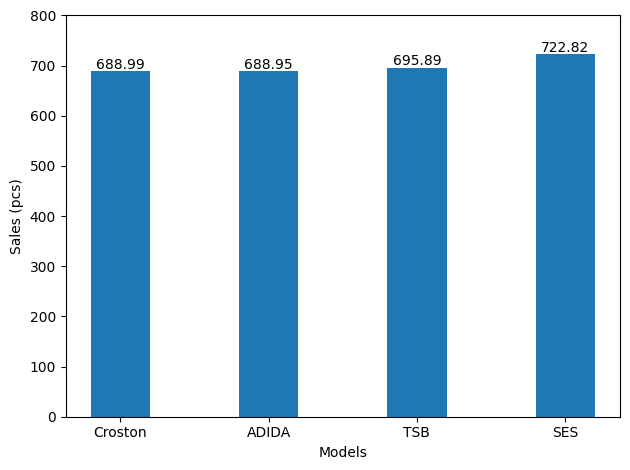

In [ ]:
fig, ax = plt.subplots()

ax.bar(x, y, width=0.4)
ax.set_xlabel('Models')
ax.set_ylabel('Sales (pcs)')
ax.set_xlabel('Models')
ax.set_ylim(0, 800)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 5, s=str(round(value,2)), ha='center')

plt.tight_layout()

# -----------------------------------------------

In [ ]:
!pip install pyInterDemand -q

In [ ]:
# Import
from pyInterDemand.algorithm.intermittent import plot_int_demand, classification, mase, rmse
from pyInterDemand.algorithm.intermittent import croston_method

In [ ]:
dataset = df.query('unique_id == "PRODUCT_B" ')
dataset.head()

,unique_id,ds,y
568,PRODUCT_B,2011-01-03,702
569,PRODUCT_B,2011-01-04,402
570,PRODUCT_B,2011-01-05,438
571,PRODUCT_B,2011-01-06,19
572,PRODUCT_B,2011-01-07,0


In [ ]:
# Prepare Time Series TS
ts       = dataset['y'].copy(deep = True)
ts.index = pd.DatetimeIndex(dataset['ds'], dayfirst = True)
ts       = ts.sort_index()
ts       = ts.reindex(pd.date_range(ts.index.min(), ts.index.max()), fill_value = 0)
ts       = ts.loc[ts[(ts != 0)].first_valid_index():]
print('')
print('Total Number of Observations: ', ts.shape[0])
print('Total Number of Zeros: ', len(ts[ts == 0]))
print('Start Date: ', ts.index[0])
print('End Date: '  , ts.index[-1])
print('')


Total Number of Observations:  817
Total Number of Zeros:  399
Start Date:  2011-01-03 00:00:00
End Date:  2013-03-29 00:00:00



In [ ]:
# Time Series Classification
adi, cv_sq = classification(ts)

ADI:  1.955 , CV:  303.995 , Type:  Lumpy


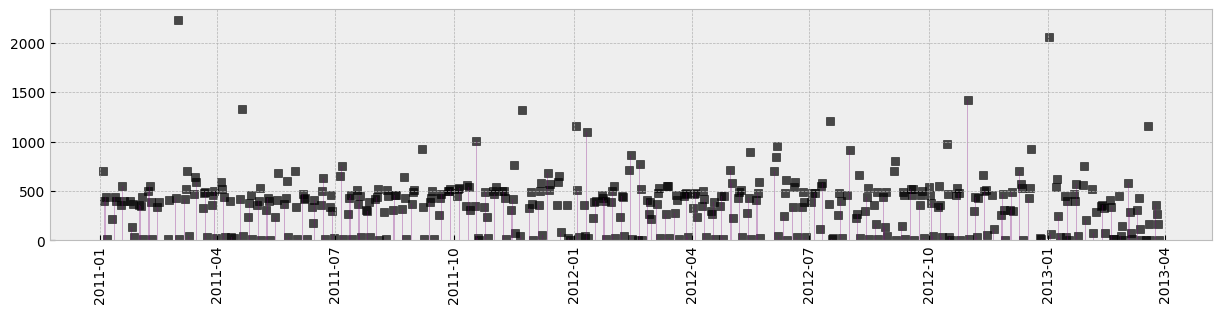

In [ ]:
# Time Series Plot
plot_int_demand(ts, size_x = 15, size_y = 3, bar_width = 0.3)

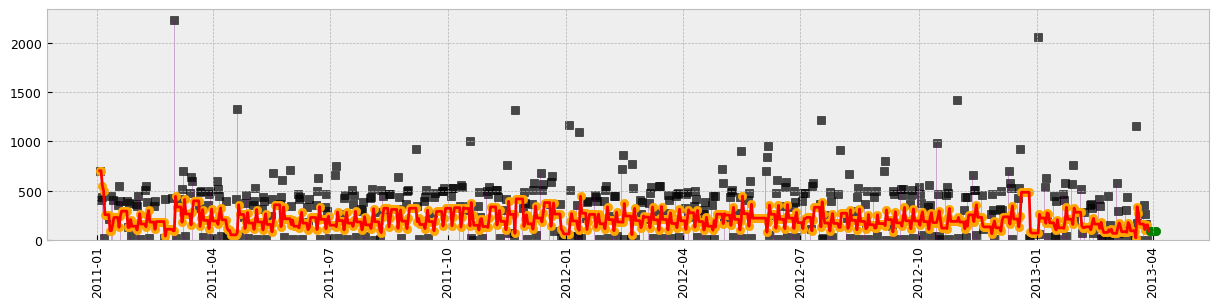

In [ ]:
# Croston
v, q, forecast = croston_method(ts, alpha = 0.5, n_steps = 7)
plot_int_demand(ts, size_x = 15, size_y = 3, bar_width = 0.3, prediction = forecast)

In [ ]:
# Error
print('MASE = ', round(mase(ts, forecast), 3), ', RMSE = ', round(rmse(ts, forecast), 3))

MASE =  1.335 , RMSE =  305.028


In [ ]:
forecast.tail(8).round()

2013-03-28    154.0
2013-03-29     90.0
2013-03-30     90.0
2013-03-31     90.0
2013-04-01     90.0
2013-04-02     90.0
2013-04-03     90.0
2013-04-04     90.0
Freq: D, dtype: float64